In [16]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
from vaegan_fc import *
#from vaegan_conv import *
from vae2 import Variational_Autoencoder
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from tensorflow.python.framework import dtypes
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from dataset import DataSet
mnist = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [33]:
tf.reset_default_graph()

In [34]:
# Train
sess = tf.InteractiveSession()
build_encoder = Encoder(20)
build_decoder = Decoder(20)


model = Variational_Autoencoder(sess, build_encoder, build_decoder, dataset=mnist.train,
            batch_size = 100, z_dim = 50, img_dim = 28**2,
           learning_rate = 1e-5, num_epochs = 10, load=False,
          checkpoint_name='test'
)

In [35]:
model.train()

Epoch 1 loss: 546.145261563 (time: 1.57408189774 s)
Epoch 2 loss: 507.505697354 (time: 1.71737194061 s)
Epoch 3 loss: 460.502880915 (time: 1.74602198601 s)
Epoch 4 loss: 393.799625799 (time: 1.6811170578 s)
Epoch 5 loss: 327.409415172 (time: 1.66355800629 s)
Epoch 6 loss: 286.987630837 (time: 1.61700510979 s)
Epoch 7 loss: 263.867499168 (time: 1.69463300705 s)
Epoch 8 loss: 249.473264881 (time: 1.70233106613 s)
Epoch 9 loss: 239.804399192 (time: 1.68474006653 s)
Epoch 10 loss: 232.756283486 (time: 1.63230586052 s)
0.0330856521924 min


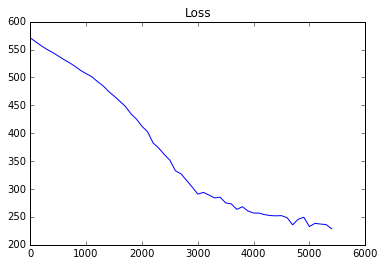

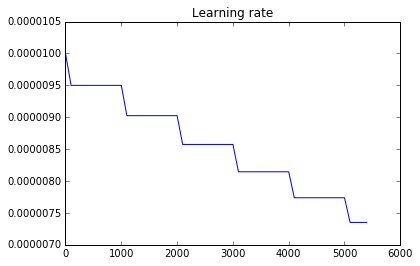

In [30]:
log = np.array(model.log).T
plt.plot(log[0,], log[1,])
plt.title('Loss')
plt.show()
plt.plot(log[0,], log[2,])
plt.title('Learning rate')
plt.show()

In [31]:
generated_images = model.generate()

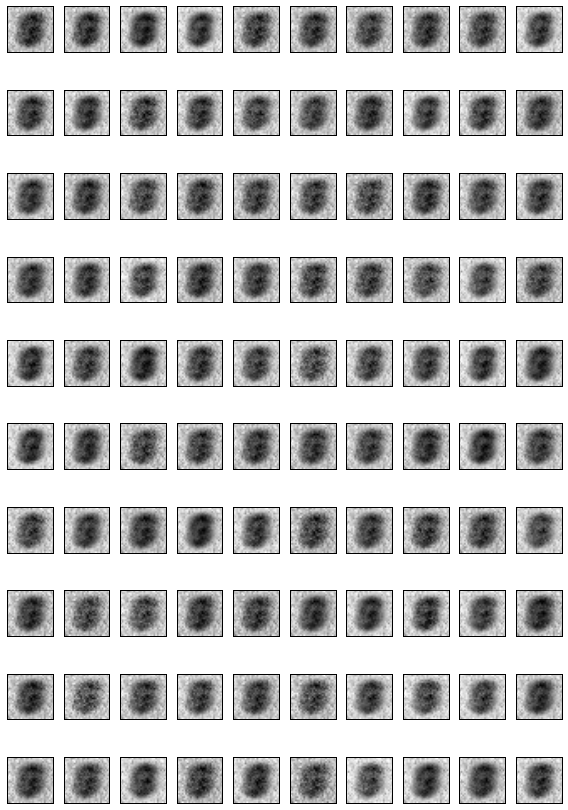

In [32]:
num_examples=10
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28,28), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()